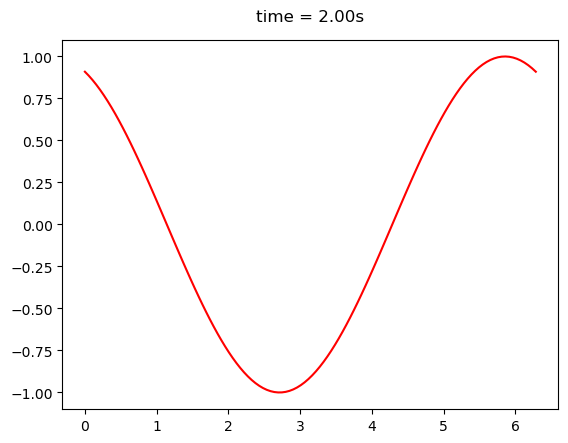

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax=fig.add_subplot()
def f(x, y):
    return np.sin(x+y)
x = np.linspace(0, 2 * np.pi, 120)
ims = []
for i in np.linspace(0,2,100):
    im,=ax.plot(x,f(x,i),'r')
    title= ax.text(0.5,1.05,"time = {:.2f}s".format(i), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax.transAxes, )
    ims.append([im,title])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False)
ani.save("sin.gif",writer='pillow')
plt.show()

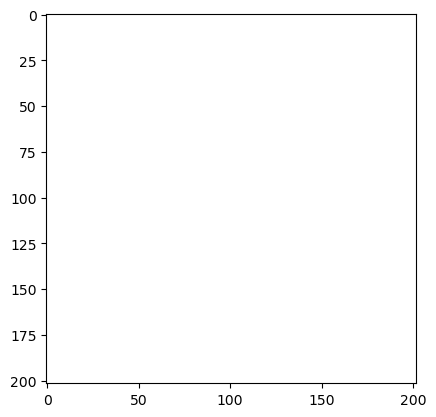

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 定义模拟区域和参数
nx = 200  # x方向节点数
ny = 200  # y方向节点数
nt = 1000  # 时间节点数
dx = 1.  # x方向步长
dy = 1.  # y方向步长
dt = 0.001  # 时间步长
rho = 1.0  # 密度
lam = 1.0  # Lamé常数
mu = 1.0  # Lamé常数
#c = np.sqrt((lam + 2 * mu) / rho)  # 波速
v = np.zeros((nx, ny))  # 波速
v[:, :200] = 400
v[:, 200:] = 100

# 定义雷克子波函数
def ricker_wavelet(t, f):
    #t = t - np.max(t)/2
    return (1 - 2 * np.pi**2 * f**2 * t**2) * np.exp(-np.pi**2 * f**2 * t**2)

# 初始化震源位置和参数
src_x = 100  # 震源x坐标
src_y = 50  # 震源y坐标
src_f = 5  # 震源频率
src_t = np.arange(0, nt*dt, dt)

src = ricker_wavelet(src_t, src_f)  # 震源信号

# 初始化波场和应力场
u = np.zeros((nx+2, ny+2))
u_old = np.zeros((nx+2, ny+2))
#u_new = np.zeros((nx-1, ny-1, nt))
sigma_x = np.zeros((nx, ny))
sigma_y = np.zeros((nx, ny))



# src = np.sin(2*np.pi*src_f*src_t)  # 震源信号
# #src[400:] = src_t[400:]
# src[400:] = 0

fig = plt.figure()
ax=fig.add_subplot()
ims = []

# 使用有限差分法求解弹性波方程
for k in range(1, nt-1):
    for i in range(1, nx+1):
        # 计算应力
        sigma_x[i-1,:] = v[i-1, :]**2 *1/dx**2 * (u[i+1, 1:-1] - 2*u[i, 1:-1] + u[i-1, 1:-1])
    for j in range(1, ny+1):
        # 计算应力
        sigma_y[:,j-1] = v[:, j-1]**2 *1/dy**2 * (u[1:-1, j+1] - 2*u[1:-1, j] + u[1:-1, j-1])

    # 计算波场
    u_old = u.copy()
    u[1:-1, 1:-1] =  dt**2 * (sigma_x[:,:] + sigma_y[:, :]) + 2*u[1:-1, 1:-1] - u_old[1:-1, 1:-1]

    # 添加震源
    u[src_x,src_y] += src[k]

    # 添加边界条件
    u[:, 0] = 0.0
    u[-1, :] = 0.0
    u[:, -1] = 0.0
    if k % 100 == 0: 
        im=ax.imshow(u, cmap='seismic', vmin=-0.1, vmax=0.1, animated=True)
        title= ax.text(0.5,1.05,"time {:2f}".format(k*dt), 
                        size=plt.rcParams["axes.titlesize"],
                        ha="center", transform=ax.transAxes, )
        ims.append([im, title])
ani = animation.ArtistAnimation(fig, ims)#, interval=50, blit=False)
ani.save("sin.gif",writer='pillow')


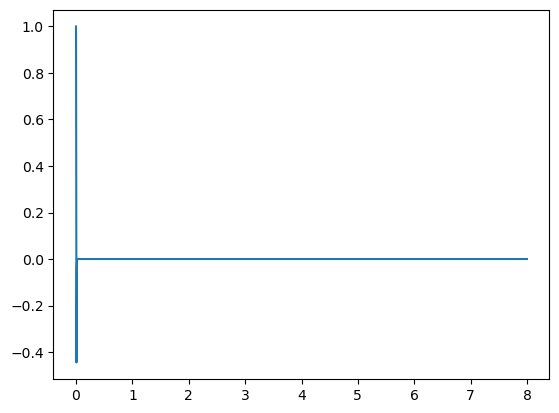

In [69]:
plt.plot(src_t, src)

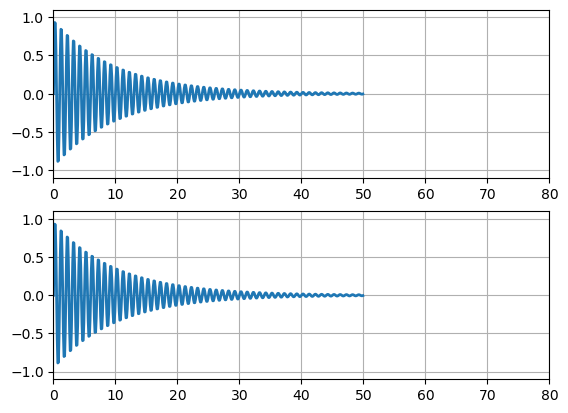

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen():
    for cnt in range(500):
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)

def init():
    del xdata[:]
    del ydata[:]
    for i in range(2):
        ax[i].set_ylim(-1.1, 1.1)
        ax[i].set_xlim(0, 10)
        # line.append(ax[i].plot([],[],lw=2))
    return line

def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    for i in range(2):
        xmin, xmax = ax[i].get_xlim()
        if t >= xmax:
            ax[i].set_xlim(xmin, 2*xmax)
            ax[i].figure.canvas.draw()
        line[i].set_data(xdata, ydata)
    return line

fig, ax = plt.subplots(2,1)
line=[] # 存储plot()返回的lines对象，需要作为全局变量，
for i in range(2):
    line.extend(ax[i].plot([], [], lw=2))
    ax[i].grid()
xdata, ydata = [], []
# 由于传入的frames参数是一个generator，save()不能探知到要存储的帧数，所以只默认保存100帧，通过save_count参数来指定正确的保存帧数。
ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,repeat=False, init_func=init,save_count=500)
ani.save("dubwave.gif", writer='pillow')
plt.show()